<style>
@media print
{
h2 {page-break-before:always}
}
</style>

# Homework 07

### Brown University  
### DATA 1010  
### Fall 2019

In [1]:
using Plots, LaTeXStrings, Distributions

## Problem 1

Consider the probability space $\Omega = \mathbb{Z} \times \{\mathrm{A}, \mathrm{B}, \mathrm{C}\}$. We will represent an element of $\Omega$ as $\omega = (\omega_1, \omega_2)$, where $\omega_1 \in \mathbb{Z}$ and $\omega_2 \in \{\mathrm{A}, \mathrm{B}, \mathrm{C}\}$.
Suppose that $\mathbb{P}(\omega_2 = \mathrm{A}) = \frac{1}{4}$,  $\mathbb{P}(\omega_2 = \mathrm{B}) = \frac{1}{5}$, and  $\mathbb{P}(\omega_2 = \mathrm{C}) = \frac{11}{20}$.

Suppose further that  
(i) the conditional distribution of $\omega_1$ given $\{\omega_2 = \mathrm{A}\}$ has probability mass function $n\mapsto \frac{1}{3}2^{-|n|}$,  
(ii) the conditional distribution of $\omega_1$ given $\{\omega_2 = \mathrm{B}\}$ is the uniform distribution on $\{-2,-1,0,1,2\}$, and  
(iii) the conditional distribution of $\omega_1$ given $\{\omega_2 = \mathrm{C}\}$ has probability mass function $n\mapsto \boldsymbol{1}_{\{n \geq 1\}} \frac{6}{\pi^2 n^2}$.

Find the conditional distribution of the random variable $Y(\omega) = \omega_2$ given: 

* $X = 2$
* $X = 7$
* $X\geq 10$,

where $X$ is the random variable defined by $X(\omega) = \omega_1$. 

(In each case, express the conditional probabilities as percentages rounded to the nearest hundredth of a percent.)

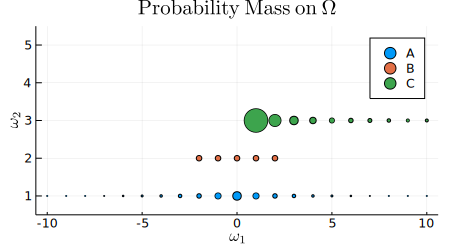

In [2]:
ns = -10:10
scatter([(n,1) for n in ns], markersize = 30*1/4*sqrt.([2.0^(-abs(n))/3 for n in ns]), label = "A")
scatter!([(n,2) for n in -2:2], markersize = 30*1/5*sqrt.([1/5 for n in -2:2]), label = "B")
scatter!([(n,3) for n in 1:ns[end]], markersize = 30*11/20*sqrt.([6/(π^2*n^2) for n in 1:ns[end]]), label = "C")
plot!(ylims=(0.5,5.5), xlabel = L"\omega_1", ylabel = L"\omega_2", fontfamily = "Palatino", size = (450,250), 
        title = L"\mathrm{Probability\: Mass\: on\: }\Omega")


*Solution*. 

(i) The information given in the problem can be used to work out the
probability mass of each $\omega \in \Omega$. If we arrange the
elements of $\Omega$ into three infinitely long rows, then the
information 
$\mathbb{P}(\omega_2 = \mathrm{A}) = \frac{1}{4}$,  $\mathbb{P}(\omega_2 =
\mathrm{B}) = \frac{1}{5}$, and  $\mathbb{P}(\omega_2 = \mathrm{C}) =
\frac{11}{20}$ says that the first row has a total mass of
$\frac{1}{4}$, the second row as a total mass of $\frac{1}{5}$, and
the third row has a total mass of $\frac{11}{20}$.

The conditional information tells us how the mass along each row is
distributed. For example, the $\frac{1}{5}$ mass on the second row
is shared equally among $\{-2,-1,0,1,2\}$. Therefore, each of those
$\omega$'s has a mass of $\frac{1}{25}$. Applying similar reasoning
to the first and third rows, we get the picture shown in the original problem statement.

Conditioning on $\{\omega_1 = 2\}$ means restricting the sample
space to the column shown in red. All other masses are set to zero,
and these three masses are each multiplied by the reciprocal of
their sum. So the conditional probability of $\omega_2 = \mathrm{A}$
given $\omega_1 = 2$ is

$$
\frac{\frac{1}{4}\cdot \frac{1}{3}\cdot
  \frac{1}{4}}{\frac{1}{4}\cdot \frac{1}{3}\cdot \frac{1}{4} +
  \frac{1}{25} + \frac{11}{20}\cdot \frac{6}{4\pi^2}} = 14.43\%, 
$$

and similarly the conditional probability of $\omega_2 = \mathrm{B}$
given $\omega_1 = 2$ is $27.70\%$, and the conditional probability
of $\omega_2 = \mathrm{C}$ given $\omega_1 = 2$ is $57.88\%$. 

(ii) Replacing 2 with 7, we get masses of

$$
(m(A), m(B), m(C)) = (8.71\%, 0\%, 91.29\%). 
$$

(iii) Conditioning on $\omega_1 \geq 10$ means restricting the
sample space to all of the columns to the right of column 9. Under
this conditional measure, the total mass of the first row is 

$$
\frac{\sum_{k=10}^\infty \frac{1}{4} \cdot \frac{1}{3} \cdot
  \left(\frac{1}{2}\right)^k}{\sum_{k=10}^\infty \frac{11}{20}\cdot
  \frac{6}{\pi^2k^2}} =  \frac{2\cdot \frac{1}{4}\cdot \frac{1}{3}
  \cdot \frac{1}{2^{10}}}{\frac{11}{20} - \sum_{k=1}^9
  \frac{11}{20}\cdot \frac{6}{\pi^2k^2}} =
\frac{0.000162760417}{0.035163406} = 0.46\%, 
$$

and the total mass in the last row is $1 - 0.46\% = 99.54\%$.

## Problem 2

Show that for each $\alpha \in [0,1]$, there exists $t \in [0,\infty]$ such that such that the likelihood ratio classifier $h_t$ is the function $h: \mathcal{X} \to \mathcal{Y}$ which minimizes
$$
L(h) = 
      \alpha \, \mathbb{P}(h(X) = +1 \text{ and }Y = -1) +
      (1-\alpha) \mathbb{P}(h(X) = -1 \text{ and }Y = +1).
$$
      

(a) Identify the relationship between $\alpha$ and its corresponding $t$ value. (For simplicity, assume that $\mathcal{X}$ is finite.) *Hint:* write $L(h)$ as a sum over the elements $x \in \mathcal{X}$. For each $x$, consider the resulting contribution to that sum if $h(x) = +1$, and similarly for $h(x) = -1$. Classify each $x$ according to which of the two contributions is smaller.



(a) We begin by writing $L$ as 
    $$L(h) = \sum_{\mathbf{x} \in \mathcal{X}} \bigg(\alpha
      p_{-1}f_{-1}(\mathbf{x})\mathbf{1}_{\{h(X) = +1\}} + (1-\alpha) p_{+1}f_{+1}(\mathbf{x})\mathbf{1}_{\{h(X) = -1\}}\bigg).$$
   
   For each $\mathbf{x} \in \mathcal{X}$, classifying it as $+1$
    contributes $\alpha p_{-1}f_{-1}(\mathbf{x})$ to this sum, while
    classifying it as $-1$ contributes
    $(1-\alpha) p_{-1}f_{-1}(\mathbf{x})$. Since each of these
    contributions can be minimized independently of the others, the
    overall minimum $h$ is the one that minimizes each
    contribution. So the minimizing $h$ is
    $$h(\mathbf{x}) =
      \begin{cases}
        +1 & \text{if } \alpha p_{-1}f_{-1}(\mathbf{x}) \leq (1-\alpha)
        p_{-1}f_{-1}(\mathbf{x}) \\
        -1 & \text{otherwise}. 
      \end{cases}$$
   This is equivalent to the likelihood ratio classifier $h_t$ with $t =
    \frac{\alpha p_{-1}}{(1-\alpha)p_{+1}}$.
    
    
(b) The loss function is a generalization of the loss function
    that that Bayes classifier minimizes, since setting $\alpha =
    \frac{1}{2}$ weights the two types of misclassification
    equally. Varying $\alpha$ allows us to weight the two
    misclassification probabilities differently. So this exercise
    shows that we could have obtained the likelihood ratio classifier
    beginning with the intuitive idea of a loss function with
    different weights for the two misclassification probabilities. 

## Problem 3

Suppose that $X$ is a length$-p$ random vector and that we have $n$ observations drawn from the distribution of $X$. Let $\widehat{\Sigma}$ be the plug-in estimator of the covariance matrix of $X$. Show that if $n < p$, then $\widehat{\Sigma}$ is singular. 


The covariance estimator is the product of a $p \times n$ matrix and an $n \times p$ matrix, so its rank is at most $n$. A square matrix whose rank is less than its dimension is singular, so $\widehat{\Sigma}$ is necessarly singular.

## Problem 4

(a) Show that if $f_1, f_2$ are different multivariate normal densities on $\mathbb{R}^2$, then the set of points $(x,y)$ for which $f_1(x,y) = f_2(x,y)$ is a line or a conic section (in other words, it is the solution set of a linear or quadratic equation).
    
(b) Show that if the covariance matrices for the two densities are the same, then the solution set of $f_1(x,y) = f_2(x,y)$ is a line.

  You might find this snippet helpful
```julia
using SymPy
@vars x y μ₁ μ₂ a b c real=true
Σ⁻¹ = [a c; c b]
v = [x - μ₁, y - μ₂]
expand(v' * Σ⁻¹ * v)
```


*Solution*.  
(a) The equation $f_1(x,y) = f_2(x,y)$ expands to 

$$
\frac{1}{\sqrt{\det \Sigma_1}} \operatorname{e}^{-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu}_1)'
  \Sigma_1^{-1} (\mathbf{x} - \boldsymbol{\mu}_1)} =
\frac{1}{\sqrt{\det \Sigma_2}} \operatorname{e}^{-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu}_2)'
  \Sigma_2^{-1} (\mathbf{x} - \boldsymbol{\mu}_2)},  
$$

where $\mathbf{x} = [x,y]$. Taking the log of both sides and combining, we find that the equation takes the form

$$
(\mathbf{x} - \boldsymbol{\mu}_1)'
\Sigma_1^{-1} (\mathbf{x} - \boldsymbol{\mu}_1) + (\mathbf{x} - \boldsymbol{\mu}_2)'
\Sigma_2^{-1} (\mathbf{x} - \boldsymbol{\mu}_2) = c, 
$$

where $c$ is some constant. The left-hand side of this equation is a polynomial in $x$ and $y$ of degree 2 or less, so its solution set is either a conic section or a line.
  
(b) Running the suggested code block and inspecting the result, we find that none of the quadratic terms involve $\mu_1$ or $\mu_2$. Therefore, if $\Sigma_1 = \Sigma_2$, then all of the quadratic terms in the equation above cancel, and we're left with a linear equation in $x$ and $y$. 

## Problem 5

(a) Train a logistic regression model to estimate the probability that an observation is red given its $x$ value, given the lists of $x$ values for red and blue observations shown. 

(b) Repeat but with with a prediction function involving a *quadratic* function of the feature value: $x\mapsto 1/(1+\exp(-\alpha-\beta x-\gamma x^2))$. Does the resulting curve have a different shape?

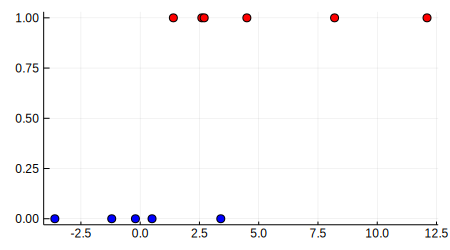

In [3]:
reds = [4.5, 2.6, 2.7, 8.2, 1.4, 12.1]
blues = [0.5, 3.4, -1.2, -3.6, -0.2]
scatter([(r,1) for r in reds], color = :red, legend = false, size = (450, 250))
scatter!([(b,0) for b in blues], color = :blue)

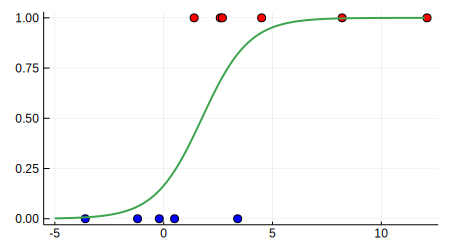

In [4]:
f(α, β, x) = 1/(1+exp(-α-β*x))
    
function loss(Z, O, θ)
    α, β = θ
    sum(log(1/(1-f(α, β, x))) for x in Z) + 
        sum(log(1/f(α, β, x)) for x in O)
end

α, β = optimize(θ->loss(blues,reds,θ), [0.0, 1.0]).minimizer

plot!(-5:0.01:12, x->f(α, β, x), linewidth = 2)

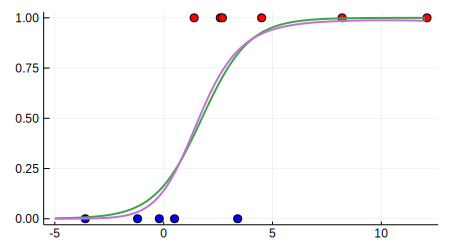

In [5]:
f(α, β, γ, x) = 1/(1+exp(-α-β*x-γ*x^2))
    
function loss(Z, O, θ)
    α, β, γ = θ
    sum(log(1/(1-f(α, β, γ, x))) for x in Z) + 
        sum(log(1/f(α, β, γ, x)) for x in O)
end

α, β, γ = optimize(θ->loss(blues,reds,θ), [0.0, 1.0, 1.0]).minimizer

plot!(-5:0.01:12, x->f(α, β, γ, x), linewidth = 2)

## Problem 6

Explain why the empirical ROC in the the fourth question from [Friday's in-class set](https://nbviewer.jupyter.org/github/data1010/problem-sets/blob/master/10-18/data1010-10-18.ipynb) has a stair-step shape. What would have to be true of the data for the shape to be different?


Consider moving the critical $x$ value from left to right along the number line. Whenever we pass a positive observation, the detection rate changes, but the false alarm rate stays the same. Whenever we pass a negative observation, the false alarm rate changes while the detection rate stays the same. Therefore, the curve always proceeds either due east or due north from one point to another. 

The change we would have to make in the data to obtain a different result is to have two or more points at the same location, including at least one positive and at least one negative observation. In that case, the false alarm rate and detection rate would change in tandem, and we would get a portion of the empirical ROC which has slope strictly between 0 and $\infty$. 

## Problem 7

Our approach to approximating the ROC empirically depends on having univariate data which are separated by a single threshold. 

(a) Suppose that the probability measure is as shown in the figure below. Plot the actual ROC for this measure. 

(b) Draw 100 observations from this measure, and devise a scheme for using them to empirically approximate the ROC. You may build in the assumption that there will be two thresholds, with the prediction function returning blue between them and red outside them, but you should avoid using any other knowledge of the underlying measure. 

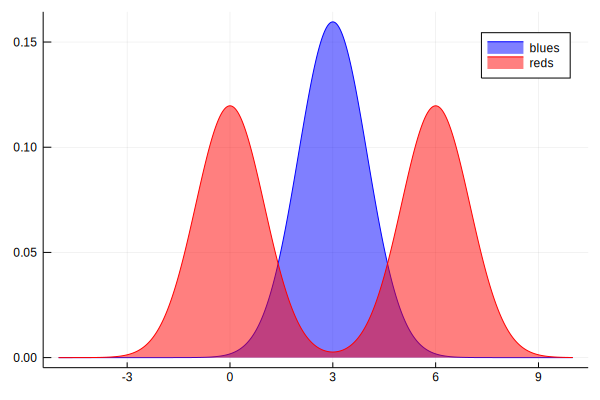

In [6]:
xgrid = -5:0.01:10
plot(xgrid, x->0.4pdf(Normal(3,1),x), fillrange = 0, fillopacity = 0.5, color = :blue, label = "blues")
plot!(xgrid, x->0.6(0.5pdf(Normal(0,1),x) + 0.5pdf(Normal(6,1),x)), fillrange = 0, fillopacity = 0.5, color = :red, label = "reds")

(a) We calculate the threshold and use `cdf` and `ccdf` to compute the detection rates and false alarm rates corresponding to each value of the likelihood ratio `t`. 

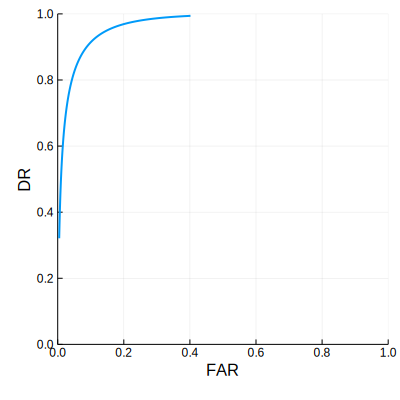

In [7]:
using Roots, Distributions, Plots
threshold(t) = find_zero(x->0.6(0.5pdf(Normal(0,1),x) + 0.5pdf(Normal(6,1),x)) - t*(0.4pdf(Normal(3,1),x)), 1.5)
DR(t) = 1 - 2cdf(Normal(3,1),threshold(t))
FAR(t) = cdf(Normal(0,1), 6-threshold(t)) - cdf(Normal(0,1), threshold(t))
function ROC()
    plot([(FAR(t), DR(t)) for t in 2.0.^(-5:0.1:5)], ratio = 1, size = (400, 400),
          legend = false, xlabel = "FAR", ylabel ="DR", xlims = (0,1), ylims = (0,1), linewidth = 2)
end
ROC()

(b) The simplest way to come up with an empirical ROC when we know there are going to be two thresholds is to adjust these thresholds independently to get many points in the DR vs FAR square. Lots of these points will be below the receiver operating characteristic, because the two thresholds will not correspond to the same likelihood ratio values. However, we can approximately detect this by taking the **convex hull** of the set of points we get. 

We'll first generate the points:

In [8]:
function randpoint()
    if rand() < 0.4
        rand(Normal(3,1)), :blue
    else
        if rand() < 0.5
            rand(Normal(0,1)), :red
        else
            rand(Normal(6,1)), :red
        end
    end
end

n = 1000
points = [randpoint() for _ in 1:n]
n_red = count(p[2] == :red for p in points)
n_blue = n - n_red

403

Then we'll test out all pairs of thresholds (in a grid of possible values) between 0 and 6. 

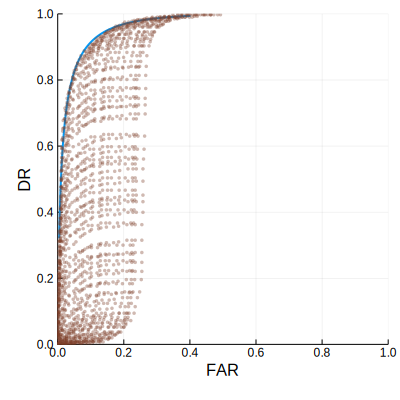

In [9]:
far_dr_pairs = []
for t1 in 0:0.1:6
    for t2 in t1:0.1:6
        push!(far_dr_pairs, (count(p[2] == :red && t1 < p[1] < t2 for p in points)/n_red,
                             count(p[2] == :blue && t1 < p[1] < t2 for p in points)/n_blue))
    end
end
ROC()
scatter!(map(identity, far_dr_pairs), ratio = 1, size = (400,400), 
        xlims = (0,1), ylims = (0,1), legend = false, ms = 2, msw = 0.2, markeropacity = 0.2)

We see that the upper/left edge of the convex hull does match the ROC quite well. Note that we could have calculated this approximate ROC using the idea of the Neyman-Pearson lemma: we identify every point for which there is no other point in the northwest quadrant relative to it (in other words, it's on the frontier in the sense that no other point does better on both DR and FAR). 

## Problem 8

Train a logistic regression classifier for identifying a car as American or Japanese based on its weight and MPG rating. Augment the feature matrix by including quadratic combinations of the regressors.

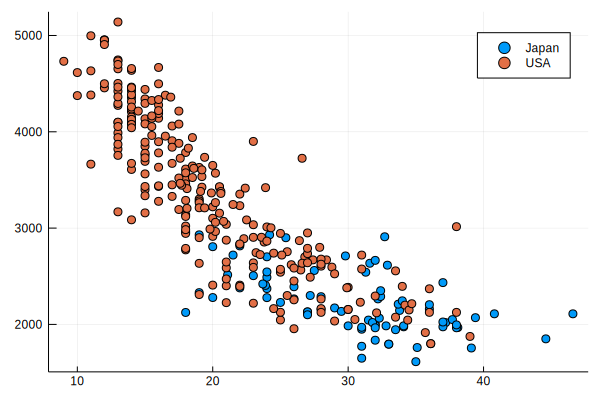

In [10]:
using VegaDatasets, Plots, DataFrames
D = DataFrame(dataset("cars"))
cars = [((x,y),c) for (x,y,c) in zip(D[:,:Miles_per_Gallon],
                                     D[:,:Weight_in_lbs],
                                     D[:,:Origin]) 
           if !any(ismissing.([x,y,c])) && c ≠ "Europe"]
x₁s = [x₁ for ((x₁,x₂),y) in cars]
x₂s = [x₂ for ((x₁,x₂),y) in cars]
ys = [y for ((x₁,x₂),y) in cars]
scatter(x₁s,x₂s,group=ys)


We first $z$-score the data, and then we use the code we developed in class. We insert the derived regressors in the definition of the function $r$.

In [ ]:
using Optim, Statistics
μ₁, σ₁ = mean(x₁s), std(x₁s)
x̃₁s = [(x₁-μ₁)/σ₁ for x₁ in x₁s]
μ₂, σ₂ = mean(x₂s), std(x₂s)
x̃₂s = [(x₂-μ₂)/σ₂ for x₂ in x₂s]
ỹs = [y == "USA" ? 0 : 1 for y in ys]
σ(u) = 1/(1 + exp(-u))
r(β,x) = σ(β⋅[1; x; x.^2; x[1]*x[2]])
C(β,xᵢ,yᵢ) = yᵢ*log(1/r(β,xᵢ))+(1-yᵢ)*log(1/(1-r(β,xᵢ)))
L(β) = sum(C(β,[x₁,x₂],y) for (x₁,x₂,y) in zip(x̃₁s,x̃₂s,ỹs))
β̂ = optimize(L,ones(6),BFGS()).minimizer
xgrid = -2:1/2^5:3.5
ygrid = -2:1/2^5:3
mycgrad = cgrad([:MidnightBlue,:SeaGreen,:Yellow,:Tomato])
heatmap(xgrid,ygrid,(x,y) -> r(β̂,[x,y]), fillcolor = mycgrad, opacity = 0.4)
scatter!(x̃₁s,x̃₂s,group=ys,color=[:red :blue],markersize=2)

## Problem 9

Train a Naive Bayes classifier for identifying a car as American or Japanese based on its weight and MPG rating. For estimating the marginal densities of each class, just assume that the marginal distributions are Gaussian. 


We begin by selecting the samples from each class, and we calculate the mean and covariance matrices for each component of each class separately. To simplify the code a little, we approximate the class covariance matrices, and then we set the diagonal entries to zero. 

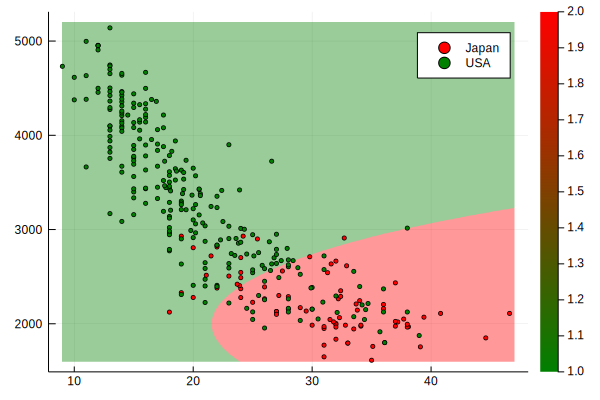

In [11]:
using Distributions
USA = hcat(x₁s,x₂s)[ys .== "USA",:]
Japan = hcat(x₁s,x₂s)[ys .== "Japan",:]
μ_USA, μ_Japan = [vec(mean(country,dims=1)) for country in (USA, Japan)]
Σ_USA, Σ_Japan = [cov(country) for country in (USA, Japan)]
for M in (Σ_USA, Σ_Japan)
 M[1,2] = 0 
 M[2,1] = 0 
end
mesh = 800 
xgrid = range(9,stop=47,length=mesh)
ygrid = range(1600,stop=5200,length=mesh)
p_USA = mean(ys .== "USA")
p_Japan = mean(ys .== "Japan")
f_USA(x,y) = pdf(MvNormal(μ_USA, Σ_USA),[x,y])
f_Japan(x,y) = pdf(MvNormal(μ_Japan, Σ_Japan),[x,y])
heatmap(xgrid, ygrid, 
        (x,y) -> argmax([p_USA * f_USA(x,y), p_Japan * f_Japan(x,y)]),
        fillcolor = cgrad([:green,:red]), opacity=0.4)
scatter!(x₁s,x₂s,group=ys,color=[:red :green],markersize=2)

## Problem 10

Use the code cells below to download public Enron emails (each of which is tagged as spam or "ham" (legitimate) and prepare them for analysis. 

(a) Find the 2000 most common words across both spam and legitimate messages. This will be your vocabulary $W$. 

(b) Regard each message as an element of $\{0,1\}^{2000}$, where the $k$th component of the message is 1 if the $k$th word of $W$ is in the message, and 0 otherwise. Train a classifier which approximates the class conditional distributions on $\{0,1\}^{2000}$ using the Naive Bayes assumption: each probability measure is a product of binomial distributions (one for each component). Your `predict` function should take an email message as input and return `"legitimate"` or `"spam"`. 

(c) Test your function on the messages shown in the last cell below.

*Note: You should not consult examples online to solve this problem. Most solutions use libraries that short-circuit the purpose of the exercise, and you have the tools you need to approach the problem by hand: you can loop through the emails to approximate word frequencies in your vocabulary, multiply proportions to get spam and legitimate message likelihoods, and compare them using the Bayes classifier formula $\operatorname{argmax}_c(p_cf_c(\mathbf{x}))$.*

In [ ]:
import Pkg; Pkg.add("HTTP"); Pkg.add("TextAnalysis")

In [ ]:
using HTTP
url = "http://www.aueb.gr/users/ion/data/enron-spam/preprocessed/"
enron_files = ["enron1.tar.gz", "enron2.tar.gz", "enron3.tar.gz",
               "enron4.tar.gz", "enron5.tar.gz", "enron6.tar.gz"]

tmp_paths = [HTTP.download(url * file) for file in enron_files]

p = tmp_paths[2] # just use the first one initially; you can use the other 5 once you have your model working
run(`tar -xvzf $p`) # unzip the downloaded files

In [12]:
using TextAnalysis
function clean_email(message)
    
    patterns = [:html => (r"<[^<>]+>", " "),
                :number => (r"[0-9]+", "number"),
                :url => (r"(http|https)://[^\s]*", "httpaddr"),
                :email => (r"[^\s]+@[^\s]+", "emailaddr"),
                :dollar => (r"[$]+", "dollar")]
    
    for (symbol, (regex, replacement)) in patterns
        message = replace(message, regex => replacement)
    end
    
    splitting_chars = [' ', '@', '$', '/', '#', '.', '-', ':', '&', '*', '+',
                       '=', '[', ']', '?', '!', '(', ')', '{', '}', ',', '\'', '"',
                       '>', '_', '<', ';', '%']
    raw_words = split(message, splitting_chars)

    # remove all words that are too short
    cleaned_words = [word for word in raw_words if length(word) > 1]

    # remove all non alphanumeric characters from each word
    alpha_numeric_pattern = r"[^a-zA-Z0-9]"
    cleaned_words = [replace(word, alpha_numeric_pattern => "") for word in  cleaned_words]
    
    string_doc = StringDocument(join(cleaned_words, ' '))
    remove_corrupt_utf8!(string_doc)
    stem!(string_doc)
    stemmed_words = split(TextAnalysis.text(string_doc), ' ')
end

clean_email (generic function with 1 method)

In [13]:
using StatsBase
vocab = sort(collect(countmap(vcat(cleaned_legit_emails..., cleaned_spam_emails...))), by = x->x[2], rev = true)[1:2000]
vocab = Set([word for (word,count) in vocab])

Set(SubString{String}["doctor", "enjoy", "regular", "tammi", "pcx", "numberand", "dure", "star", "jfarmer", "feel"  …  "part", "averag", "dudley", "tax", "numberhi", "power", "heal", "draw", "feder", "competit", "popular"])

In [14]:
cleaned_legit_emails = [clean_email(read("enron1/ham/" * email_file,String)) for email_file in readdir("enron1/ham")]
cleaned_spam_emails = [clean_email(read("enron1/spam/" * email_file,String)) for email_file in readdir("enron1/spam")];

In [15]:
import DataStructures: DefaultDict

In [16]:
legit_counts = DefaultDict(0)
for email in cleaned_legit_emails
    for word in unique(email)
        if word in vocab
            legit_counts[word] += 1
        end
    end
end

legit_probabilities = DefaultDict(1, Dict([a => b/length(cleaned_legit_emails) for (a,b) in legit_counts]));

spam_counts = DefaultDict(0)
for email in cleaned_spam_emails
    for word in unique(email)
        if word in vocab
            spam_counts[word] += 1
        end
    end
end

spam_probabilities = DefaultDict(1, Dict([a => b/length(cleaned_spam_emails) for (a,b) in spam_counts]));

In [17]:
legit_baseline = sum(log1p(-x) for x in values(legit_probabilities)) + log(length(cleaned_legit_emails))
spam_baseline = sum(log1p(-x) for x in values(spam_probabilities)) + log(length(cleaned_spam_emails));
legit_baseline, spam_baseline

(-63.96315516680106, -61.47926397692125)

In [18]:
function predict(message, t)
    email = clean_email(message)
    legit_log_prob = legit_baseline
    spam_log_prob = spam_baseline
    for word in unique(email)
        if word in vocab
            legit_log_prob += log(legit_probabilities[word]) - log1p(-legit_probabilities[word])
            spam_log_prob += log(spam_probabilities[word]) - log1p(-spam_probabilities[word])
        end
    end
    spam_log_prob - legit_log_prob > t ? "spam" : "legit"
end

predict (generic function with 2 methods)

We do end up having to adjust the threshold to classify these four messages correctly.

In [19]:
test_messages = [
    "Do you still want to play rackets on Friday?",
    "Your purchase won a \$1000 gift card! Click here to claim",
    "Call the IRS immediately to avoid prosecution",
    "Would you mind providing some feedback on this recommendation letter? Thanks!"
]

[predict(message, 3) for message in test_messages]

4-element Array{String,1}:
 "legit"
 "spam" 
 "spam" 
 "legit"